In [1]:
ENV["GKS_ENCODING"] = "utf-8"

#cfg_file = "/home/julian/Hamburg/lDGA_checks/square_test/config.toml"
cfg_file = "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml"
using Plots, LaTeXStrings
using Plots.PlotMeasures
using LaTeXStrings
empty!(ARGS)
push!(ARGS, cfg_file)
#push!(ARGS, "/home/julisn/Hamburg/ED_data/cuprate_test/b20.0_mu1.0/lDGAConfig.toml")# "G:/tmp_ED_data/U2.0_b20.0_mu1.0.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"));

  Activating project at `G:\Codes\LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b] (cache misses: include_dependency fsize change (6), invalid header (12), mismatched flags (2))


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 10


DBG: NOT using diagonal terms in λ₀


┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.4356, χLoc_d(1:301) = 0.0644
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24860048983264754 ?=? 0.2500077791504396 ?≈? 0.25000777915043954 ≟ 0.24999903238559407"
│ Local EoM check for the first 5 frequencies: 0.0001, 0.0002, 0.0002, 0.0003, 0.0003  
└     
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.000297843848 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000209554839 ≟ 0


DBG: NOT using diagonal terms in λ₀


21×300×301 Array{ComplexF64, 3}:
[:, :, 1] =
  0.00059386-1.34002e-5im  …  0.000594092+1.33895e-5im
  0.00057459-1.34051e-5im     0.000574822+1.33944e-5im
 0.000555542-1.34099e-5im     0.000555774+1.33992e-5im
 0.000525157-1.34176e-5im     0.000525389+1.3407e-5im
  0.00050669-1.34222e-5im     0.000506922+1.34116e-5im
 0.000459358-1.3434e-5im   …   0.00045959+1.34234e-5im
 0.000466085-1.34326e-5im     0.000466318+1.3422e-5im
 0.000448336-1.3437e-5im      0.000448568+1.34264e-5im
 0.000402882-1.34481e-5im     0.000403115+1.34375e-5im
 0.000348727-1.34615e-5im      0.00034896+1.34509e-5im
 0.000419938-1.34444e-5im  …   0.00042017+1.34338e-5im
 0.000402769-1.34485e-5im     0.000403001+1.3438e-5im
 0.000358834-1.34592e-5im     0.000359066+1.34486e-5im
 0.000306555-1.34718e-5im     0.000306787+1.34613e-5im
   0.0002659-1.34817e-5im     0.000266132+1.34712e-5im
 0.000402698-1.34487e-5im  …   0.00040293+1.34382e-5im
 0.000385751-1.34528e-5im     0.000385983+1.34423e-5im
 0.000342396-1.34633e-5

# Improved Sums

## Motivation

Our goal is to find a good surrogate for the sum over infinitely many Matsubara frequencies, i.e. $\lim_{N \rightarrow \infty}\sum_{i\nu_{-N}}^{i\nu_{N}} f(\nu) \longrightarrow \lim_{N \rightarrow \infty} \text{S}_N[f(\nu)]$.
This operator $\text{S}$ can be defNined in different ways.
Here we will test two different approaches.

### Extrapolation approach

In order to quantify the error made by the finite approximation of the infinite sum, we first construct the following function:
$$
    g_\text{N} = \sum_{x = i \nu_{-N}}^{i \nu_{N}} f(x)
$$
We now want to extract the true limit of $N \rightarrow \infty$ from $g_\text{N}$.
For any finite summation we assume, that there error Terms fall of as $\sum_{i=1}^k \frac{c_i}{(i\nu_N)^i}$ with coefficients $c_i \in \mathbb{C}$.
We can therefore assume that the finite approximation of $g_\text{N}$ has a tail of the form 
$$
    S(j) = \lim_{N \rightarrow \infty} S_N(j) = \lim_{N \rightarrow \infty} \sum_{i=0}^N \frac{c_i}{(j)^i}
$$
It is clear that for $N \rightarrow \infty$, only $c_0$ survives and all other terms are artifacts of the finite approximation.
By fitting $S_N$ to the numerical data of $\tilde{f}_\text{N}$ we can determine the coefficients and extract the true value of the sum
$$
    \lim_{N \rightarrow \infty} g_\text{N} = c_0
$$


### Analytic tail approach

In cases in which we know the true tail of a function: $\lim_{n \rightarrow \infty} f(i \nu_n) = \lim_{n \rightarrow \infty} \sum_{j = 1}^N \frac{c_j}{i \nu_n}$ we can use this knowledge to improve convergence of a sum.
Note that $c_0 = 0$ in order for the sequence to converge in the first place.
We write
\begin{align}
    \sum_{n} f(i \nu_n) & = \sum_{n} \left(f(i \nu_n) - \sum_{j = 1}^N \frac{c_j}{(i \nu_n)^j}\right) + \sum_{n}\sum_{j = 1}^N \frac{c_j}{i \nu_n}
\end{align}
The $\sum_{n}\sum_{j = 1}^N \frac{c_j}{i \nu_n}$ is analytically 

#### Fit to kinetic energy


We now use that the leading order of the $\chi$ tail is known to be $\frac{E_\text{kin}}{(i \omega_n)^2}$ (TODO: cite!).
This tail coefficient is subtracted, analytically summend and only the remaining higher order terms have to be fitted to real data.
\begin{align}
    \sum_{n= 1}^\infty \frac{E_\text{kin}}{(i \omega_n)^2}
     & = \sum_{n= 1}^\infty \frac{E_\text{kin}}{\left(i \frac{(2n) \pi}{\beta}\right)^2} \\
     & = \frac{ E_\text{kin} \beta^2}{- 4 \pi^2} \sum_{n= 1}^\infty \frac{1}{\left( n\right)^2} \\
     & = - \frac{E_\text{kin} \beta^2}{4 \pi^2} \left(
       \frac{\pi^2}{6}
     \right) \\
     & = - \frac{E_\text{kin} \beta^2}{24} 
\end{align}
This can be used to reduce the number of tail coefficients we need to fit:
\begin{align}
    \frac{1}{\beta} \sum_{n= -\infty}^\infty \chi (i \omega_n) 
           & =  \frac{\chi (i \omega_0)}{\beta} + \frac{1}{\beta}  \sum_{n= \mathbb{N} \setminus \{ 0\}} \left( \chi (i \omega_n) - \frac{E_\text{kin}}{(i \omega_n)^2}  \right) +  \frac{1}{\beta} \sum_{n=\mathbb{N} \setminus \{ 0\} } \frac{E_\text{kin}}{(i \omega_n)^2} \\
        & \stackrel{\text{h.f.}}{=} \frac{\chi (i \omega_0)}{\beta} + \frac{2}{\beta}  \sum_{n= 1 }^\infty \left( \chi (i \omega_n) - \frac{E_\text{kin}}{(i \omega_n)^2}  \right) -  \frac{E_\text{kin} \beta}{12} 
\end{align}


#### Kinetic energy from ED

We compute $E_\text{kin}$ from ED using 
\begin{align}
    E_\text{kin} & = \frac{1}{\beta} \sum_{k, n} \epsilon_k G(i  \nu_n, k) 
    = \frac{1}{\beta} \sum_{n} \Delta (i \nu_n) G_\text{IMP}(i \nu_n)\\
    \Delta(i \nu_n) & = \sum_l \frac{V_l^2}{i\nu_n - \epsilon_l}
\end{align}
For the $\nu_n$ sum we use the knowledge of the full tail:
\begin{align}
    \sum_{n=0}^\infty \Delta (i \nu_n) G_\text{IMP}(i \nu_n) & = 
    \sum_{n} \left( \Delta (i \nu_n) G_\text{IMP}(i \nu_n) - \sum_k \frac{V_k^2}{(i\nu_n)^2} \right) + \sum_{n,k} \frac{V_k^2}{(i\nu_n)^2}  \\
    & = \sum_{n} \left( \Delta (i \nu_n) G_\text{IMP}(i \nu_n) - \sum_k \frac{V_k^2}{(i\nu_n)^2} \right) - \sum_{k}V_k^2 \frac{\beta}{2} 
\end{align}

Bath parameters are read from ``hubb.andpar`` and the impurity Greens function from ``gm_wim``


## Method for the analytical lsq fit of frequency sums 

It turns out, that the fitting procedure for the numerical data above is quite unstable. However, it is possible to compute the coefficients for the least squares fit (lsq fit) analytically i.e. with arbitrary precision. This approach will be discussed here. 
Our $n$ datapoints for the fit are given by $g_n$.

In order to minimize $\text{LSQ}(g_n) = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \left(S_n(j) - \left(g_{n}\right)_j\right)^2$
with the tail function for data points $g_j$
\begin{equation}
    S_n(j) = \sum_{k = 0}^n \frac{c_{k}}{j^k}
\end{equation}
$k, l$ are a running index for all elements of the set of coefficients $C$ with elements denoted by $c$.

We first construct 
$M_{kl} = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \frac{1}{j^k j^{l}}$
(derivation: minimize least squares sum analytically) and then for the $n$-th set of $j$ datapoints $\left(g_{n}\right)_j$:
\begin{equation}
\left(b_{n}\right)_{l} = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \frac{\left(g_{n}\right)_j}{j^d}
\end{equation}

We can then obtain the fit-coefficients $c_n$ of the $n$-th data point by solving $M c_n = b_n$

# Comparison $\chi_\text{Impurity}$ with  $\chi_\text{numerical}$

## general $\chi_{\sigma \sigma'}$ sums
 - Compute the naive sum $\chi^{\omega}_{\sigma \sigma', \text{naive}}$ as $\frac{1}{\beta^2} \sum_{\nu \nu'}\chi^{\omega \nu \nu'}_{\sigma \sigma'}$
 - Compute the fitted sum $\chi^{\omega}_{\sigma \sigma', \text{fit}}$ as $\frac{1}{\beta^2}  \text{FitSum}_{\nu \nu'}(\chi^{\omega \nu \nu'}_{\sigma \sigma'})$

In [5]:
# load asymptotic data
χchAsympt_in = lDGAhelper.sP.χ_helper.χch_asympt;
χspAsympt_in = lDGAhelper.sP.χ_helper.χsp_asympt;
χchDMFT = lDGAhelper.χDMFT_d
χspDMFT = lDGAhelper.χDMFT_m
χchED_in = copy(χchDMFT)#asympt_vars["chi_ch_ED"];
χspED_in = copy(χspDMFT)#asympt_vars["chi_sp_ED"];

# naive:
#χchED_ω_naive = vcat(reverse(χDMFTch[2:end]), χDMFTch)
#χspED_ω_naive = vcat(reverse(χDMFTsp[2:end]), χDMFTsp)
χchED_ω_naive = sum(χchED_in,dims=[2,3])[:,1,1]/(mP.β^2);
χspED_ω_naive = sum(χspED_in,dims=[2,3])[:,1,1]/(mP.β^2);

# fit preparation:
nc = [0,1,2,3]
νmax_end   = floor(Int64,size(χd,2)/2)
start = ceil(Int64, (1/4)*νmax_end)
W = LadderDGA.build_weights(start, νmax_end, nc)
println("Building fit matrix for ν frequencies from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")

# fit
reduction_prct = -0.05


χchED_ω_fit = [LadderDGA.sum_freq(χchDMFT[i,:,:], [1,2], true, mP.β, weights=W)[1,1] for i in 1:size(χchDMFT,1)];
χspED_ω_fit = [LadderDGA.sum_freq(χspDMFT[i,:,:], [1,2], true, mP.β, weights=W)[1,1] for i in 1:size(χspDMFT,1)];
usable_ch = LadderDGA.find_usable_interval(real(χchED_ω_fit), reduce_range_prct=reduction_prct)
usable_sp = LadderDGA.find_usable_interval(real(χspED_ω_fit), reduce_range_prct=reduction_prct)
usable_fit_DMFT = intersect(usable_ch, usable_sp)

# ed
χchAsympt = χchAsympt_in[1:ceil(Int64,length(χchED_ω_naive)/2)]
χchAsympt = vcat(reverse(χchAsympt[2:end]), χchAsympt)
χspAsympt = χspAsympt_in[1:ceil(Int64,length(χspED_ω_naive)/2)]
χspAsympt = vcat(reverse(χspAsympt[2:end]), χspAsympt);


LoadError: UndefVarError: `build_weights` not defined in `LadderDGA`
Suggestion: check for spelling errors or missing imports.

### Comparison plots

Range is >>extended<< instead of reduced in order to show boundary effects.

Usable range: 31:51. Reduction: -5.0%


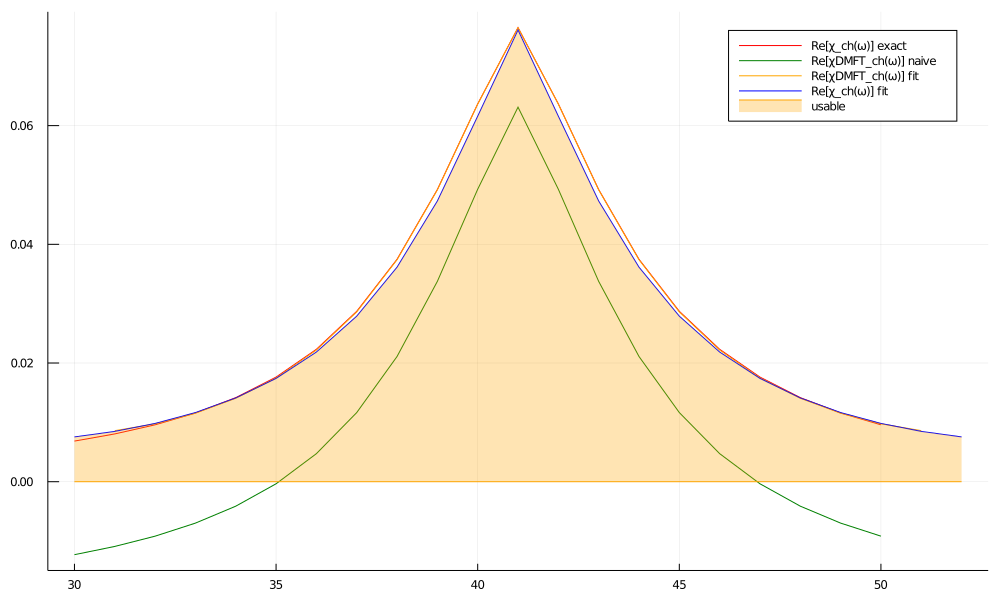

In [87]:
include("src/GFFit.jl")
reduction_prct_pl = -0.1
usable_ch_pl = LadderDGA.find_usable_interval(real(χchED_ω_fit), reduce_range_prct=reduction_prct_pl)

fit_y = real(χchED_ω_fit[usable_ch_pl])
lusable_pl = length(usable_ch_pl)
naive_y = real(χchED_ω_naive[ceil(Int64,length(χchED_ω_naive)/2-lusable_pl/2):floor(Int64,length(χchED_ω_naive)/2+lusable_pl/2)-1])
asym_y = real(χchAsympt[ceil(Int64,length(χchAsympt)/2-lusable_pl/2):floor(Int64,length(χchAsympt)/2+lusable_pl/2)-1])
println("Usable range: ", usable_ch, ". Reduction: $(100*reduction_prct)%")
plot(usable_ch_pl .- 1, asym_y, label="Re[χ_ch(ω)] exact", c=:red, size=(1000,600))
plot!(usable_ch_pl .- 1, naive_y, label="Re[χDMFT_ch(ω)] naive", c=:green)
plot!(usable_ch_pl, fit_y, label="Re[χDMFT_ch(ω)] fit", c=:orange)
plot!(nlQ_ch.usable_ω, real.(nlQ_ch.χ_ω[nlQ_ch.usable_ω]), label="Re[χ_ch(ω)] fit", c=:blue)
plot!(nlQ_ch.usable_ω, repeat([0], length(nlQ_ch.usable_ω)), fillrange=real(nlQ_ch.χ_ω[nlQ_ch.usable_ω]), fillalpha=0.3, c=:orange, label="usable")

Usable range: 31:51. Reduction: -30.0%


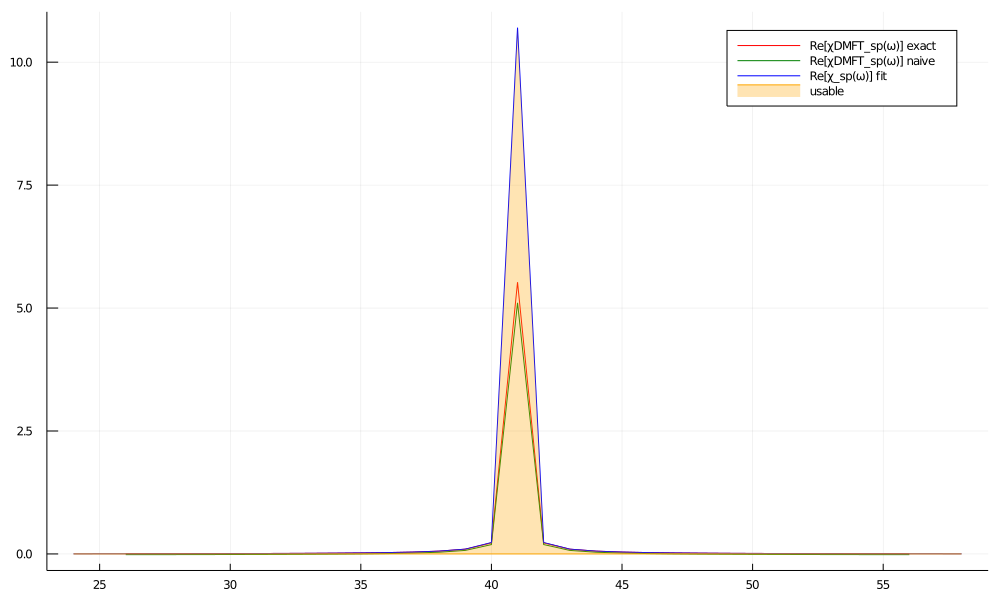

In [88]:
reduction_prct = -0.3
usable_sp_pl = LadderDGA.find_usable_interval(real(χspED_ω_fit), reduce_range_prct=reduction_prct)
fit_y = real(χspED_ω_fit[usable_sp_pl])
lusable_pl = length(usable_sp_pl)
naive_y = real(χspED_ω_naive[ceil(Int64,length(χspED_ω_naive)/2-lusable_pl/2)+1:floor(Int64,length(χchED_ω_naive)/2+lusable_pl/2)])
asym_y = real(χspAsympt[ceil(Int64,length(χspAsympt)/2-lusable_pl/2)+1:floor(Int64,length(χspAsympt)/2+lusable_pl/2)])
println("Usable range: ", usable_ch_pl, ". Reduction: $(100*reduction_prct)%")
plot(usable_sp_pl, asym_y, label="Re[χDMFT_sp(ω)] exact", c=:red, size=(1000,600))
plot!(usable_sp_pl, naive_y, label="Re[χDMFT_sp(ω)] naive", c=:green)
plot!(nlQ_sp.usable_ω, real.(nlQ_sp.χ_ω[nlQ_sp.usable_ω]), label="Re[χ_sp(ω)] fit", c=:blue)
#plot!(nlQ_sp_λ.usable_ω, real.(nlQ_sp_λ.χ_ω[nlQ_sp_λ.usable_ω]), label="Re[χ_sp_λ(ω)] fit", c=:purple)
plot!(nlQ_sp.usable_ω, repeat([0], length(nlQ_sp.usable_ω)), fillrange=real(nlQ_sp.χ_ω[nlQ_sp.usable_ω]), fillalpha=0.3, c=:orange, label="usable")

 ## $\chi_{\uparrow \uparrow}$ (? and $\chi_{\uparrow \downarrow}$ ?) sums 

We know that $\sum_\omega \chi_{\uparrow \uparrow}^\omega = \frac{n}{2} (1 - \frac{n}{2})$ and $\sum_\omega \chi_{\uparrow \downarrow}^\omega = \langle n_\uparrow n_\downarrow \rangle - \frac{n^2}{4}$
 
For $\chi_{\uparrow \uparrow}$ we have knowledge of the tail and can therefore use another approximation scheme. We will test four different methods: naiive sum (appr0), fitted sum (appr1), tail corrected sum (appr2) and taill corrected + fitted sum (appr4).

 - Compute all four variants of the $\omega$ sums for the exact ED results.
 - Compute two approximations of the $\omega$ sum over the full $\chi$: $\chi^{\omega}_{\sigma \sigma', \text{ naiive}} = \frac{1}{\beta^2}  \sum_{\nu \nu'}  \chi^{\omega \nu \nu'}_{\sigma \sigma'}$ and $\chi^{\omega}_{\sigma \sigma', \text{ fit}} = \frac{1}{\beta^2}  \text{FitSum}_{\nu \nu'}  \chi^{\omega \nu \nu'}_{\sigma \sigma'}$
-----
We now want to compute all four approximations for both inputs, we expect $\text{res} \approx \frac{n}{2}(1-\frac{n}{2})$:
 - $\text{res}_{\text{ appr0, naiive/fit}} = \frac{1}{\beta} \sum_{\omega} \chi^{\omega}_{\uparrow\uparrow, \text{ naiive/fit}}$
 - $\text{res}_{\text{ appr1, naiive/fit}} = \text{FitSum}_{\omega}\chi^{\omega}_{\uparrow\uparrow, \text{ naiive/fit}}$
 - $\text{res}_{\text{ appr2, naiive/fit}} = \frac{1}{\beta}  \sum_{\omega}  \left( \chi^{\omega}_{\uparrow\uparrow, \text{ naiive/fit}} - \frac{E_\text{kin}}{(i \omega_n)^2}  \right)  -  \frac{E_\text{kin} \beta}{12}  $
 - $\text{res}_{\text{ appr3, naiive/fit}} =  \text{FitSum}_{\omega}\left( \chi^{\omega}_{\uparrow\uparrow, \text{ naiive/fit}} - \frac{E_\text{kin}}{(i \omega_n)^2}  \right)  -  \frac{E_\text{kin} \beta}{12}  $

## Plot $\chi^\omega_{\uparrow \uparrow} \cdot (i \omega)^2 \rightarrow E_\text{kin}$

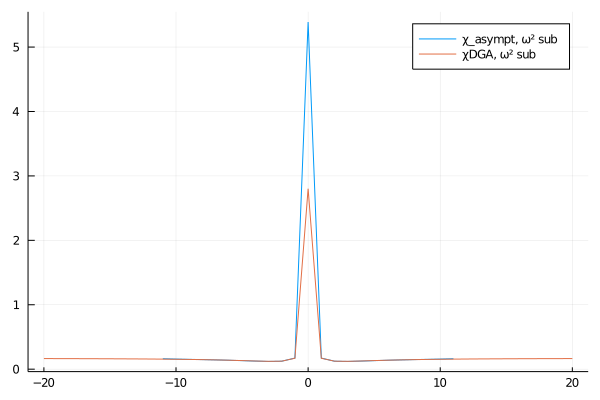

In [89]:
function multiply_tail2(inp, mP)
    setprecision(100) do
        res = zeros(BigFloat, length(inp))
        for n in 1:length(inp)
            res[n] = BigFloat(-inp[n]) * (BigFloat(n - floor(Int64, length(inp)/2) - 1)*BigFloat(2*π/mP.β))^BigFloat(2)
        end
        Float64.(res, RoundDown)
    end
end

function tail2(inp, mP)
    setprecision(1000) do
        res = zeros(BigFloat, length(inp))
        for n in 1:length(inp)
            res[n] = BigFloat(-inp[n]) * (BigFloat(n - floor(Int64, length(inp)/2) - 1)*BigFloat(2*π/mP.β))^BigFloat(2)
        end
        res#Float64.(res, RoundDown)
    end
end

χupupAsympt_tail2 = multiply_tail2(real.(χupupAsympt), mP)
χupup_DGA_tail2 = multiply_tail2(real.(χDGAupup), mP)
#plot(real(χupupAsympt .- χupupAsympt_tail2)[end-200:end], label="v1")
plot(usable_DGA .- length(χDGAupup)/2 .- 0.5, real(χDGAupup[usable_DGA] .- χupup_DGA_tail2[usable_DGA]), label="χ_asympt, ω² sub")
plot!(-20:20,real(χupupAsympt .- χupupAsympt_tail2)[end-10020:end-9980], label="χDGA, ω² sub")
#plot(abs.(tail4[end-200:end]))
#plot(abs.(χupupAsympt[end-200:end]))

Ekin = -0.1691548157566971
manual cutoff for lowest and highest 9 frequencies!!


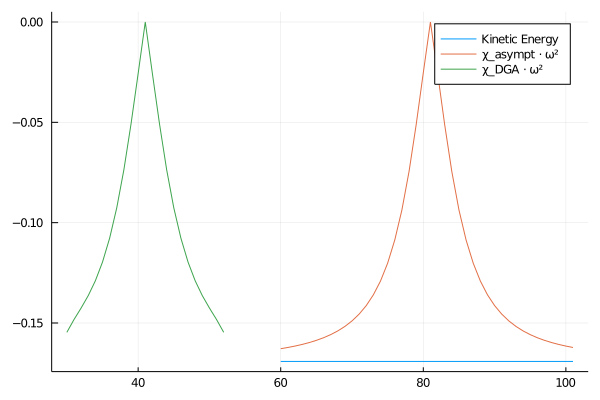

In [90]:
# helper functions
function multiply_tail(inp, mP)
    res = copy(inp)
    setprecision(1000) do
        for n in 1:length(inp)
            res[n] *= (LadderDGA.iω(n - floor(Int64, length(inp)/2) - 1))^2
        end
    end
    return res
end

# load and prepare data
iνₙ, GImp_pos    = LadderDGA.readGImp(LadderDGA.env.inputDir * "/gm_wim", only_positive=true)
ϵₖ, Vₖ, μ    = LadderDGA.read_anderson_parameters(LadderDGA.env.inputDir * "/hubb.andpar");
Ekin = real(LadderDGA.E_Kin_ED(iνₙ, ϵₖ, Vₖ, GImp_pos, mP.β))
println("Ekin = $(Ekin)")
χupupAsympt_in = (χchAsympt_in+χspAsympt_in)/2
χupdoAsympt_in = (χchAsympt_in-χspAsympt_in)/2
χupupAsympt = vcat(reverse(χupupAsympt_in[2:end]), χupupAsympt_in)
χupdoAsympt = vcat(reverse(χupdoAsympt_in[2:end]), χupdoAsympt_in)
χDMFTupup_naive = (χchED_ω_naive + χspED_ω_naive)/2
χDMFTupup_fit = (χchED_ω_fit + χspED_ω_fit)/2
χDGAupup = (nlQ_sp.χ_ω + nlQ_ch.χ_ω)/2
println("manual cutoff for lowest and highest 9 frequencies!!")
usable_DGA = intersect(nlQ_sp.usable_ω,nlQ_ch.usable_ω)

# plot
χupupAsympt_tail = multiply_tail(χupupAsympt, mP)
χDMFTupup_naive_tail = multiply_tail(χDMFTupup_naive, mP)
χDMFTupup_fit_tail = multiply_tail(χDMFTupup_fit, mP)
χDGAupup_tail = multiply_tail(χDGAupup, mP)

xasympt = @slice_middle (1:length(χupupAsympt)) 9980
χupupAsympt_slice = @slice_middle real(χupupAsympt) 9980
χupup_Asympt_tail_slice = @slice_middle real(χupupAsympt_tail) 9980
xfit = usable_fit_DMFT .- ceil(Int64,length(χDMFTupup_fit)/2)#[usable_fit_DMFT] .-
plot(xasympt .- 9920, repeat([Ekin], length(χupupAsympt_slice)), label="Kinetic Energy")#, ylims = (-0.1692,-0.168))
#plot!(xasympt, real(χupupAsympt_slice), label="χ_asympt")
plot!(xasympt .- 9920, χupup_Asympt_tail_slice, label="χ_asympt ⋅ ω²")
plot!(usable_DGA, real.(χDGAupup_tail[usable_DGA]), label="χ_DGA ⋅ ω²")

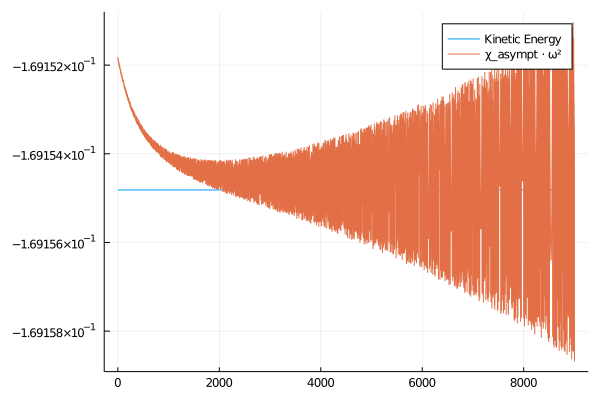

In [91]:
plot(repeat([Ekin], length(real(χupupAsympt_tail)[end-9000:end])), label="Kinetic Energy")#, ylims = (-0.1692,-0.168))
#plot!(xasympt, real(χupupAsympt_slice), label="χ_asympt")
plot!(real(χupupAsympt_tail)[end-9000:end], label="χ_asympt ⋅ ω²")

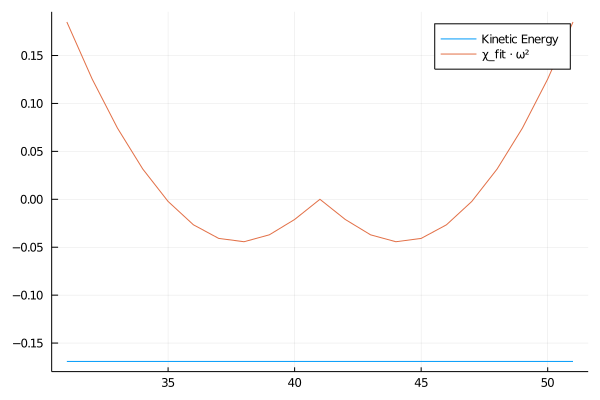

In [92]:
plot(usable_fit_DMFT, repeat([Ekin], length(usable_fit_DMFT)), label="Kinetic Energy")
#plot!(xfit, real(χDMFTupup_naive), label="χ_fit")
plot!(usable_fit_DMFT, real(χDMFTupup_naive_tail)[usable_fit_DMFT], label="χ_fit ⋅ ω²")

## Compute and compare all corrections

In [120]:
# helper functions
function subtract_tail!(inp, Ekin, mP)
    iωₙ2_full  = zeros(length(inp))
    for i in 1:length(inp)
        iωₙ2_full[i] = (LadderDGA.iω(i - ceil(Int64, length(inp)/2) - 0))^2
    end
    ind_0 = argmax(real(inp))
    println("zero index: ", ind_0, " - ", argmax(real(iωₙ2_full)))
    for n in 1:length(inp)
        if iωₙ2_full[n] != 0
            inp[n] -= (Ekin/iωₙ2_full[n])
        end
    end
end

# fit preparation:
χupupAsympt_appr0 = sum(copy(χupupAsympt))/mP.β
χupupAsympt_appr1 = copy(χupupAsympt)
χupupAsympt_appr2 = copy(χupupAsympt)
χupupAsympt_appr3 = copy(χupupAsympt)

χupupAsympt_cut = @slice_usable χupupAsympt usable_fit_DMFT
χupupAsympt_cut_appr0 = sum(copy(real.(χupupAsympt_cut)))/mP.β
χupupAsympt_cut_appr1 = copy(real.(χupupAsympt_cut))
χupupAsympt_cut_appr2 = copy(real.(χupupAsympt_cut))
χupupAsympt_cut_appr3 = copy(real.(χupupAsympt_cut))

χDMFTupup_naive_appr0 = sum(copy(real.(χDMFTupup_naive)[usable_fit_DMFT]))/(mP.β)
χDMFTupup_naive_appr1 = copy(real.(χDMFTupup_naive[usable_fit_DMFT]))
χDMFTupup_naive_appr2 = copy(real.(χDMFTupup_naive[usable_fit_DMFT]))
χDMFTupup_naive_appr3 = copy(real.(χDMFTupup_naive[usable_fit_DMFT]))

χDMFTupup_fit_appr0 = sum(copy(real.(χDMFTupup_fit[usable_fit_DMFT])))/(mP.β)
χDMFTupup_fit_appr1 = copy(real.(χDMFTupup_fit[usable_fit_DMFT]))
χDMFTupup_fit_appr2 = copy(real.(χDMFTupup_fit[usable_fit_DMFT]))
χDMFTupup_fit_appr3 = copy(real.(χDMFTupup_fit[usable_fit_DMFT]))

χDGAupup_appr0 = sum(copy(real.(χDGAupup[usable_DGA])))/(mP.β)
χDGAupup_appr1 = copy(real.(χDGAupup[usable_DGA]))
χDGAupup_appr2 = copy(real.(χDGAupup[usable_DGA]))
χDGAupup_appr3 = copy(real.(χDGAupup[usable_DGA]))

nc = [0,1,2,3,4]
νmax_end   = floor(Int64,size(χupupAsympt,1)/2)
start = ceil(Int64, (1/4)*νmax_end)
W1 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr1,asympt from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χupupAsympt_appr1 = LadderDGA.sum_freq(χupupAsympt_appr1, [1], true, mP.β, weights=W1)[1]

νmax_end   = floor(Int64,size(χDMFTupup_naive_appr1,1)/2)
start = ceil(Int64, (1/4)*νmax_end)
W2 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr1,naive from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χDMFTupup_naive_appr1 = LadderDGA.sum_freq(χDMFTupup_naive_appr1, [1], true, mP.β, weights=W2)[1]

νmax_end   = floor(Int64,size(χDMFTupup_fit_appr1,1)/2)
start = ceil(Int64, (1/4)*νmax_end)
W3 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr1,fit from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χDMFTupup_fit_appr1 = LadderDGA.sum_freq(χDMFTupup_fit_appr1, [1], true, mP.β, weights=W3)[1]

νmax_end   = floor(Int64,size(χupupAsympt_cut,1)/2)
start = ceil(Int64, (1/4)*νmax_end)
W4 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr1,asympt_cut from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χupupAsympt_cut_appr1 = LadderDGA.sum_freq(χupupAsympt_cut_appr1, [1], true, mP.β, weights=W4)[1]

νmax_end   = floor(Int64,size(χDGAupup_appr1,1)/2)
start = ceil(Int64, (1/4)*νmax_end)
W5 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr1,DGA from ", start, " to ", νmax_end, " with ", length(nc), " coeffcients")
χDGAupup_appr1 = LadderDGA.sum_freq(χDGAupup_appr1, [1], true, mP.β, weights=W5)[1]


# tail preparation
iνₙ, GImp    = LadderDGA.readGImp(LadderDGA.env.inputDir * "/gm_wim", only_positive=true)
ϵₖ, Vₖ, μ    = LadderDGA.read_anderson_parameters(LadderDGA.env.inputDir * "/hubb.andpar");
Ekin = real(LadderDGA.E_Kin_ED(iνₙ, ϵₖ, Vₖ, GImp, mP.β))
rem_full = Ekin*(mP.β*mP.β)/12
println("Ekin = $(Ekin), Subterm=$(rem_full)")
subtract_tail!(χupupAsympt_appr2, Ekin, mP)
subtract_tail!(χDMFTupup_naive_appr2, Ekin, mP)
subtract_tail!(χDMFTupup_fit_appr2, Ekin, mP)
subtract_tail!(χupupAsympt_cut_appr2, Ekin, mP)
subtract_tail!(χDGAupup_appr2, Ekin, mP)
χupupAsympt_appr2_res = (sum(χupupAsympt_appr2)-rem_full)/mP.β 
χDMFTupup_naive_appr2_res = (sum(χDMFTupup_naive_appr2)-rem_full)/mP.β 
χDMFTupup_fit_appr2_res = (sum(χDMFTupup_fit_appr2)-rem_full)/mP.β 
χupupAsympt_cut_appr2_res = (sum(χupupAsympt_cut_appr2)-rem_full)/mP.β
χDGAupup_appr2_res = (sum(χDGAupup_appr2)-rem_full)/mP.β


# fit preparation 2:
nc = [0,1,2,3,4]
νmax_end   = floor(Int64,size(χupupAsympt_appr2,1)/2)
start = ceil(Int64, (1/4)*νmax_end)
W1 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr3,asympt from ", start, " to ", νmax_end, " with ", length(nc), " coefficients")
χupupAsympt_appr3 = LadderDGA.sum_freq(χupupAsympt_appr2, [1], true, mP.β, correction=-rem_full, weights=W1)[1]

νmax_end   = floor(Int64,size(χDMFTupup_naive_appr2,1)/2)
start = ceil(Int64, (1/4)*νmax_end)
W2 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr3,naive from ", start, " to ", νmax_end, " with ", length(nc), " coefficients")
χDMFTupup_naive_appr3 = LadderDGA.sum_freq(χDMFTupup_naive_appr2, [1], true, mP.β, correction=-rem_full, weights=W2)[1]

νmax_end   = floor(Int64,size(χDMFTupup_fit_appr2,1)/2)
start = ceil(Int64, (1/4)*νmax_end)
W3 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr3,fit from ", start, " to ", νmax_end, " with ", length(nc), " coefficients")
χDMFTupup_fit_appr3 = LadderDGA.sum_freq(χDMFTupup_fit_appr2, [1], true, mP.β, correction=-rem_full, weights=W3)[1]

νmax_end   = floor(Int64,size(χupupAsympt_cut_appr2,1)/2)
start = ceil(Int64, (1/4)*νmax_end)
W4 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr3,asympt_cut from ", start, " to ", νmax_end, " with ", length(nc), " coefficients")
χupupAsympt_cut_appr3 = LadderDGA.sum_freq(χupupAsympt_cut_appr2, [1], true, mP.β, correction=-rem_full/mP.β, weights=W4)[1]

νmax_end   = floor(Int64,size(χDGAupup_appr2,1)/2)
start = ceil(Int64, (1/4)*νmax_end)
W5 = build_weights(start, νmax_end, nc)
println("Building fit matrix for appr3,DGA from ", start, " to ", νmax_end, " with ", length(nc), " coefficients")
χDGAupup_appr3 = LadderDGA.sum_freq(χDGAupup_appr2, [1], true, mP.β, correction=-rem_full, weights=W5)[1]


# naive sums

println("\n----------- Naive Sums -----------\n")
println("Naive sum for χ_asympt_upup_naive: ", χupupAsympt_appr0)
println("Naive sum for χ_upup_DMFT_naive: ", χDMFTupup_naive_appr0)
println("Naive sum for χ_upup_DMFT_fit: ", χDMFTupup_fit_appr0)
println("Naive sum for χ_asympt_upup_cut_naive: ", χupupAsympt_cut_appr0)
println("Naive sum for χ_upup_DGA: ", χDGAupup_appr0)

# Fitted sums
println("\n----------- Fitted Sums -----------\n")
println("Fitted sum for χ_asympt_upup_naive: ", χupupAsympt_appr1)
println("Fitted sum for χ_upup_DMFT_naive: ", χDMFTupup_naive_appr1)
println("Fitted sum for χ_upup_DMFT_fit: ", χDMFTupup_fit_appr1)
println("Fitted sum for χ_asympt_upup_cut_naive: ", χupupAsympt_cut_appr1)
println("Fitted sum for χ_upup_DGA: ", χDGAupup_appr1)


# Tail subtracted sums
println("\n------ Tail Subtracted Sums ------\n")
println("Tail subtracted sum for χ_asympt upup: ", χupupAsympt_appr2_res)
println("Tail subtracted sum for χ_upup_DMFT_naive: ", χDMFTupup_naive_appr2_res )
println("Tail subtracted sum for χ_upup_DMFT_fit: ", χDMFTupup_fit_appr2_res )
println("Tail subtracted sum for χ_asympt_cut upup: ", χupupAsympt_cut_appr2_res)
println("Tail subtracted sum for χ_upup_DGA: ", χDGAupup_appr2_res)


# Tail subtracted sums
println("\n---------- Tail+Fit Sums ----------\n")
println("Tail+Fit sum for χ_asympt upup: ", χupupAsympt_appr3)
println("Tail+Fit sum for χ_upup_DMFT_naive: ", χDMFTupup_naive_appr3)
println("Tail+Fit sum for χ_upup_DMFT_fit: ", χDMFTupup_fit_appr3)
println("Tail+Fit sum for χ_asympt_cut upup: ", χupupAsympt_cut_appr3)
println("Tail+Fit sum for χ_upup_DGA: ", χDGAupup_appr3)


Building fit matrix for appr1,asympt from 2500 to 10000 with 5 coeffcients
Building fit matrix for appr1,naive from 3 to 10 with 5 coeffcients
Building fit matrix for appr1,fit from 3 to 10 with 5 coeffcients
Building fit matrix for appr1,asympt_cut from 3 to 10 with 5 coeffcients
Building fit matrix for appr1,DGA from 3 to 11 with 5 coeffcients
Ekin = -0.1691548157566971, Subterm=-3.171652795438071
zero index: 10001 - 10001
zero index: 11 - 11
zero index: 11 - 11
zero index: 11 - 11
zero index: 12 - 12
Building fit matrix for appr3,asympt from 2500 to 10000 with 5 coefficients
Building fit matrix for appr3,naive from 3 to 10 with 5 coefficients
Building fit matrix for appr3,fit from 3 to 10 with 5 coefficients
Building fit matrix for appr3,asympt_cut from 3 to 10 with 5 coefficients
Building fit matrix for appr3,DGA from 3 to 11 with 5 coefficients

----------- Naive Sums -----------

Naive sum for χ_asympt_upup_naive: 0.24998714641543707
Naive sum for χ_upup_DMFT_naive: 0.19796034302

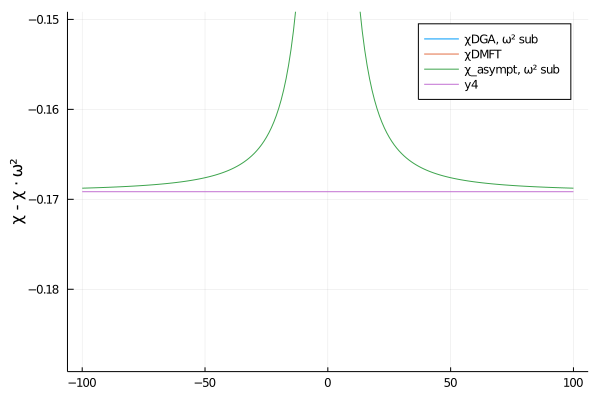

In [94]:
function multiply_tail2(inp, mP)
    setprecision(100) do
        res = zeros(BigFloat, length(inp))
        for n in 1:length(inp)
            res[n] = BigFloat(-inp[n]) * (BigFloat(n - floor(Int64, length(inp)/2) - 1)*BigFloat(2*π/mP.β))^BigFloat(2)
        end
        Float64.(res, RoundDown)
    end
end

function tail2(inp, mP)
    setprecision(1000) do
        res = zeros(BigFloat, length(inp))
        for n in 1:length(inp)
            res[n] = BigFloat(-inp[n]) * (BigFloat(n - floor(Int64, length(inp)/2) - 1)*BigFloat(2*π/mP.β))^BigFloat(2)
        end
        res#Float64.(res, RoundDown)
    end
end

χupupAsympt_tail2 = multiply_tail2(real.(χupupAsympt), mP)
χupup_DGA_tail2 = multiply_tail2(real.(χDGAupup), mP)
χupup_DMFT_tail2 = multiply_tail2(real.(χDMFTupup_fit), mP)
#plot(real(χupupAsympt .- χupupAsympt_tail2)[end-200:end], label="v1")
plot(usable_DGA .- length(χDGAupup)/2 .- 0.5, real(χDGAupup[usable_DGA] .+ χupup_DGA_tail2[usable_DGA]), ylabel="χ - χ ⋅ ω²", label="χDGA, ω² sub",ylim=(Ekin-0.02,Ekin+0.02))
plot!(usable_fit_DMFT .- length(χDMFTupup_fit)/2 .- 0.5, real(χDMFTupup_fit[usable_fit_DMFT] .+ χupup_DMFT_tail2[usable_fit_DMFT]), label="χDMFT")
plot!(-100:100,real(χupupAsympt .+ χupupAsympt_tail2)[end-10100:end-9900], label="χ_asympt, ω² sub")
plot!(-100:100, repeat([Ekin], length(-100:100)))
#plot(abs.(tail4[end-200:end]))
#plot(abs.(χupupAsympt[end-200:end]))

In [95]:
χupupAsympt_middle = @slice_usable χupupAsympt usable_DGA
plot(usable_fit_DMFT,multiply_tail2(real.(χDMFTupup_naive[usable_fit_DMFT]),mP),markershape = :hexagon,markersize = 3,ylabel="χ ⋅ ω²", xlabel="ωₙ", label="naive")
plot!(usable_fit_DMFT,multiply_tail2(real.(χDMFTupup_fit[usable_fit_DMFT]),mP),markershape = :hexagon,markersize = 3, label="DMFT fit")
plot!(usable_DGA,multiply_tail2(real.(χupupAsympt_middle),mP), label="asympt",markershape = :hexagon,markersize = 3)
#plot!(usable_DGA,multiply_tail2(real.(χDGAupup[usable_DGA]),mP), label="DGA")
plot!(usable_DGA,repeat([Ekin], length(usable_DGA)), label="EKin",markershape = :hexagon,markersize = 3)
savefig("plot.png")

# Number of coefficients and tail subtraction

In this section, we will ivestigate the impact of different numbers of exponents in die Richardson fit and subtraction of known tails on the overall sum

In [ ]:
usable_ω = intersect(impQ_sp.usable_ω, impQ_ch.usable_ω)
χupup_DMFT_ω = real(impQ_sp.χ_ω .+ impQ_ch.χ_ω)[usable_ω] ./ 2

usable_ω2 = intersect(impQ_sp2.usable_ω, impQ_ch2.usable_ω)
χupup_DMFT_ω2 = real(impQ_sp2.χ_ω .+ impQ_ch2.χ_ω)[usable_ω2] ./ 2

χupup_ω_csum = LadderDGA.build_fνmax_fast(χupup_DMFT_ω, 50);
χupup_ω_csum2 = LadderDGA.build_fνmax_fast(χupup_DMFT_ω2, 50);

iωn = 1im .* 2 .* (-sP.n_iω:sP.n_iω)[usable_ω] .* π ./ mP.β
iωn2 = 1im .* 2 .* (-sP.n_iω:sP.n_iω)[usable_ω2] .* π ./ mP.β
EKin = impQ_sp.tailCoeffs[3]
χupup_DMFT_ω_sub = LadderDGA.subtract_tail(χupup_DMFT_ω,EKin, iωn)
χupup_DMFT_ω_sub2 = LadderDGA.subtract_tail(χupup_DMFT_ω2,EKin, iωn2)

χupup_ω_sub_csum = LadderDGA.build_fνmax_fast(χupup_DMFT_ω_sub, 50);
χupup_ω_sub_csum2 = LadderDGA.build_fνmax_fast(χupup_DMFT_ω_sub2, 50);

In [1]:
exps_l = [0:i for i in 2:6]

res = zeros(length(exps_l),  50 - 1,4)  # no nu fit, nu fit, no nu fit + sub, nu fit + sub
for (j,exps) in enumerate(exps_l)
for i in 1:50 - maximum(exps)
    ind = exps .+ i
    sh = LadderDGA.Richardson(ind,exps,method=:bender)
    sh2 = LadderDGA.Richardson(exps .+ 1,exps,method=:bender)
    res[j,i,1] = LadderDGA.esum_c(real.(χupup_ω_csum)[ind], sh) ./ mP2.β
    res[j,i,2] = LadderDGA.esum_c(real.(χupup_ω_csum2)[ind], sh2) ./ mP2.β
    res[j,i,3] = LadderDGA.esum_c(real.(χupup_ω_sub_csum)[ind], sh) ./ mP2.β .- EKin*mP.β/12
    res[j,i,4] = LadderDGA.esum_c(real.(χupup_ω_sub_csum2)[ind], sh2) ./ mP2.β .- EKin*mP.β/12
end
end

LoadError: UndefVarError: LadderDGA not defined

In [ ]:
using Plots
using LaTeXStrings
l = @layout([[A B; C D] E{.15w}])
# method $method
colors = palette(:tab10)
p = Array{Plots.Plot,1}(undef, 5)
v = χupup_ω_sub_csum2[end]./ mP2.β .- EKin*mP.β/12
for method in 1:4
    ind = (method == 1 || method == 3) ? (1:15) : (1:size(res,2))
    if method == 4
        p[method] = plot(res[1,ind,method], c=colors[1], xlabel="# csum terms", legend=false, ylims=(0.249,0.2505))
    elseif method == 1
        p[method] = plot(res[1,ind,method], c=colors[1], ylabel=L"$\sum_{q,\omega}  \chi_{\uparrow\uparrow}(\omega, q)$", legend=false)
    elseif method == 2
        p[method] = plot(res[1,ind,method], c=colors[1], legend=false, ylims=(0.245,0.2505))
    elseif method == 3
        p[method] = plot(res[1,ind,method], c=colors[1], xlabel="# csum terms", ylabel=L"$\sum_{q,\omega}  \chi_{\uparrow\uparrow}(\omega, q)$", legend=false)
    end
    for i in 2:size(res,1)
        plot!(p[method], res[i,ind,method], c=colors[i], label="$(i+1) exps", legend=false)
    end
    hline!(p[method], [0.25 0.25 0.25 0.25], c=colors[size(res,1)+1], label="true value")
    
    hline!(p[method], [v v v v], c=colors[(size(res,1)+2)], label="pure sub")  
end

p[5] = plot([0 for y in 1:1, i in 1:(size(res,1)+2)], title=["method 1" "mthod 2" "method 3" "method 4"], palette = :tab10, legendfontsize=12 , foreground_color_legend = nothing, showaxis = false, ticks=false, grid = false, label = hcat(["exps = $(exps_l[i])" for y in 1:1, i in 1:size(res,1)],["true value"  "no bosonic fit"])) #
mval, mind = findmin(abs.(res[3,:,4] .- 0.25))
println("best candidate: tail subtraction + 0:4 exp fit at index $mind range. result = $(round(res[3,mind,4],digits=7)).\nPure tail subtraction for bosonic frequencies gives $(round(v,digits=7))")
plot(p..., layout = l, size = (900, 600))

# Test simple $\lambda$ correction

In [96]:
include("src/lambdaCorrection.jl");
λ, _ = calc_λ_correction(χsp, χLocsp, qMultiplicity, modelParams);
println(λ)

LoadError: LoadError: UndefVarError: ImpurityQuantities not defined
in expression starting at /home/julian/Hamburg/LadderDGA/src/lambdaCorrection.jl:11

# Test $\chi_\text{lDGA}$  

## Physical properties
We expect $\frac{1}{2 \beta} \sum_{q,\omega} \left( \chi^\text{ch}(q, \omega)_\text{lDGA} + \chi^{\text{sp}, \lambda}_\text{lDGA}(q, \omega) \right) = \frac{n}{2} (1-\frac{n}{2}) = \frac{1}{4}$
From the first section we assume, that the number of coefficients should be set to $4$ and $\nu_\text{maxstart}$ should be in the last $50 \%$ of the tail.

We start by computing the $\nu, \nu'$ sum over $\chi^\text{sp}$ and $\chi^\text{ch}$.
The correct tail behaviour is checked by plotting both functions as a function of $\omega$.  
  
  - Test $\sum \chi_q^\omega$  
  - Test $\sum \chi_{q,\lambda}^\omega$  
  

In [97]:
maximum(real(χsp[41,:]))
size(Σ_ladder)

LoadError: UndefVarError: χsp not defined

# Tests for $χ_{sp}^\lambda$
- $\frac{1}{2 \beta} \sum_{\omega, q} (χ^{ch}_\omega (q) + χ^{sp,\lambda}_\omega (q)) \stackrel{!}{=} \chi_\text{Loc} \rightarrow \frac{n}{2}(1-\frac{n}{2})$
- wenige q punkte, $\omega = 0$: $χ_\text{sp}^{-1}(\omega=0,q) \approx \sum_i \frac{1}{\lambda + a_i}$

In [98]:
plot(real([sum(χsp[i,:] .* qMultiplicity for i = 1:size(χsp,1))/qNorm]))

LoadError: UndefVarError: χsp not defined

In [99]:
qNorm      = sum(qMultiplicity)*modelParams.β
xrange = -1:0.1:3
t = [real(sum([sum(((1 ./ χsp[i,:] .+ λ)).^(-1) .* qMultiplicity)  for i in 1:size(χsp,1)])/qNorm - χLocsp) for λ in xrange];
dt = [-real(sum([sum(((1 ./ χsp[i,:] .+ λ)).^(-2)) for i in 1:size(χsp,1)])/qNorm) for λ in xrange];
plot(xrange,t, label="f(λ) = Σ_{q,ω} χ^λ - χLocsp", size=(1200,800))
#plot!(twinx(), xrange,dt, label="f'(λ)", color="green",legend=:bottomright)
vline!([maximum(-real(χsp[41,:]) .^ (-1))], label="λ_max-pole")
plot!(xrange,repeat([0],size(xrange,1)))

LoadError: UndefVarError: qMultiplicity not defined

# Vergleich $\chi^\lambda$ gegen $\chi$

In [100]:
size(sum(χsp,dims=[2])[:,1])

LoadError: UndefVarError: χsp not defined

In [101]:
size(real(sum(χsp,dims=[2])[:,1]))

LoadError: UndefVarError: χsp not defined

In [102]:
plot(real(sum(χsp,dims=[2])[1]))
plot!(real(sum(χsp_impr,dims=[2])[1]))
#plot!(repeat([real(χLocsp)], size(χsp_impr,1)))

LoadError: UndefVarError: χsp not defined

# Test $\Sigma(k,\nu)$

### Investigation of noisy data for $\Sigma$
We inject Gaussian noise into each of the inputs of $\Sigma ( \gamma_{ch}, \gamma_{sp},\chi_{ch}, \chi_{sp}, \chi_0, F_{\uparrow \downarrow}, G(\nu_n + \omega_n))$ in order to investigate the sensitivity of $\Sigma$ to faulty input data.

### Investigation of sum fits for $\Sigma$

The internal sums to compute $\Sigma$ are formally defined over infinitely many Matsubara frequencies.
We want to investigate the usefulness of the previously discussed methods in this context.

In [106]:
include("src/GFFit.jl")
include("src/ladderDGATools.jl")
@time Σ_ladder = calc_DΓA_Σ(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
                    qMultiplicity, qGrid, kGrid, modelParams, simParams);
@time Σ_ladder_impr1,Σ_ladder_impr2,tmp = calc_DΓA_Σ_impr(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
                    qMultiplicity, qGrid, kGrid, modelParams, simParams);

LoadError: LoadError: UndefVarError: ModelParameters not defined
in expression starting at /home/julian/Hamburg/LadderDGA/src/ladderDGATools.jl:5

In [107]:
plot(real(tmp[:]))

LoadError: UndefVarError: tmp not defined

In [108]:
cut = 0
numin = Int(floor((length(tmp)-cut)*3/4))
numax = Int(floor(length(tmp))-cut)
W2 = build_weights(numin, numax, [0,1,2,3])
plot(real(build_fνmax(tmp, W2, [1])))

LoadError: UndefVarError: tmp not defined

### Compare naive vs. fit

### Compare to $\Sigma_\text{loc}$